In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
df = pd.read_csv("https://raw.githubusercontent.com/Vincentim27/data/refs/heads/main/beverages.csv")

In [2]:
df.head()

,Product ID,Sales Volume (L),Product Category,Price per Liter (IDR),Advertising Spend (USD),Number of Retailers,Temperature (°C),Holiday Season,Market Share (%),Competitor Price per Liter (IDR)
0,101,25795,Energy Drink,29371,8629,592,21.721954,0,6.1,18711
1,102,10860,Water,36142,8628,677,34.122994,1,8.9,35860
2,103,48158,Soda,14693,17288,636,31.763093,1,5.7,28134
3,104,21284,Water,13991,16431,620,26.935868,1,4.9,25261
4,105,16265,Soda,20154,16883,467,32.974439,1,6.3,16960


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Product ID                        1000 non-null   int64  
 1   Sales Volume (L)                  1000 non-null   int64  
 2   Product Category                  1000 non-null   object 
 3   Price per Liter (IDR)             1000 non-null   int64  
 4   Advertising Spend (USD)           1000 non-null   int64  
 5   Number of Retailers               1000 non-null   int64  
 6   Temperature (°C)                  1000 non-null   float64
 7   Holiday Season                    1000 non-null   int64  
 8   Market Share (%)                  1000 non-null   float64
 9   Competitor Price per Liter (IDR)  1000 non-null   int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 78.2+ KB


In [4]:
df.describe()

,Product ID,Sales Volume (L),Price per Liter (IDR),Advertising Spend (USD),Number of Retailers,Temperature (°C),Holiday Season,Market Share (%),Competitor Price per Liter (IDR)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,600.500000,29382.829000,28561.014000,12491.809000,551.600000,27.203567,0.531000,5.876800,28344.559000
std,288.819436,11786.744449,9509.768162,4252.822442,85.262464,4.375909,0.499288,2.366572,9571.931238
min,101.000000,10009.000000,12106.000000,5006.000000,400.000000,20.002798,0.000000,2.000000,11304.000000
25%,350.750000,18716.750000,20153.000000,8727.000000,475.750000,23.389352,0.000000,3.800000,20508.250000
50%,600.500000,29259.000000,28910.000000,12469.000000,552.000000,27.025778,1.000000,5.900000,28496.000000
75%,850.250000,38735.500000,36528.250000,16353.250000,621.000000,31.016128,1.000000,7.900000,36471.250000
max,1100.000000,49976.000000,44980.000000,19973.000000,699.000000,34.964342,1.000000,10.000000,44991.000000


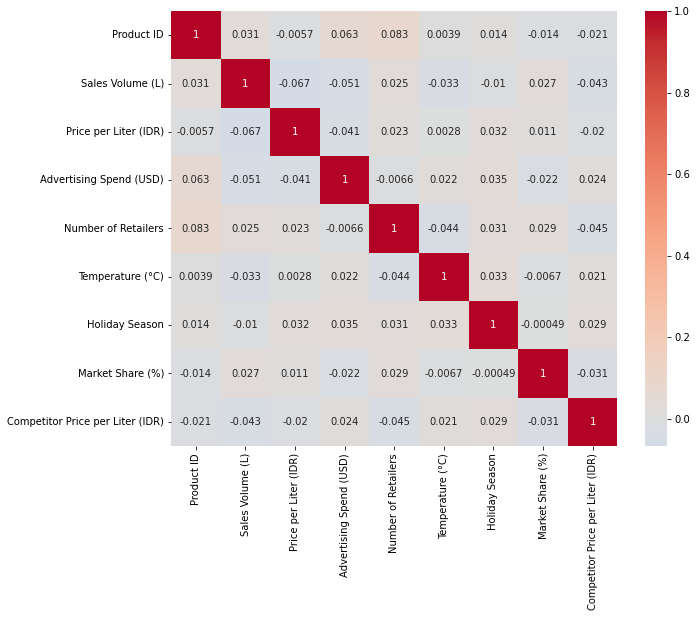

In [6]:
# Buat heatmap dari matriks korelasi
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.show()

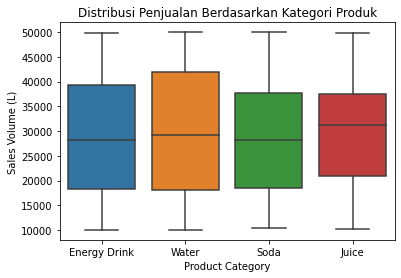

In [7]:
sns.boxplot(x='Product Category', y='Sales Volume (L)', data=df)
plt.title('Distribusi Penjualan Berdasarkan Kategori Produk')
plt.show()

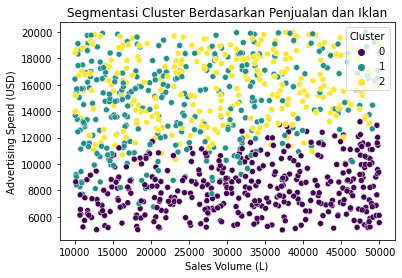

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalisasi data
features = df[['Sales Volume (L)', 'Advertising Spend (USD)', 'Number of Retailers']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualisasi cluster
sns.scatterplot(x='Sales Volume (L)', y='Advertising Spend (USD)', hue='Cluster', data=df, palette='viridis')
plt.title('Segmentasi Cluster Berdasarkan Penjualan dan Iklan')
plt.show()


In [12]:
# Menambahkan kolom margin
df['Margin (IDR)'] = df['Price per Liter (IDR)'] - df['Competitor Price per Liter (IDR)']

# Menghitung rata-rata margin per kategori
category_margin = df.groupby('Product Category')['Margin (IDR)'].mean().sort_values(ascending=False)

# Menampilkan kategori dengan margin tinggi
print("Kategori dengan Margin Tinggi:")
print(category_margin)

# Rekomendasi: Produk dengan margin tinggi
high_margin_products = df[df['Margin (IDR)'] > df['Margin (IDR)'].mean()]

# Rekomendasi: Produk dengan margin tinggi dan potensi penjualan (market share > median)
high_margin_high_potential = high_margin_products[high_margin_products['Market Share (%)'] > df['Market Share (%)'].median()]

print("Produk yang direkomendasikan untuk ditingkatkan iklan atau diberi diskon:")
print(high_margin_high_potential[['Product ID', 'Product Category', 'Margin (IDR)', 'Market Share (%)']])


Kategori dengan Margin Tinggi:
Product Category
Soda            1462.103846
Energy Drink     573.197425
Water           -440.353175
Juice           -730.501961
Name: Margin (IDR), dtype: float64
Produk yang direkomendasikan untuk ditingkatkan iklan atau diberi diskon:
     Product ID Product Category  Margin (IDR)  Market Share (%)
0           101     Energy Drink         10660               6.1
1           102            Water           282               8.9
4           105             Soda          3194               6.3
7           108            Juice          4899               9.5
11          112            Juice         15749               7.5
..          ...              ...           ...               ...
976        1077            Juice          4166               6.5
985        1086            Water          1187               9.6
988        1089            Water         12544               6.0
991        1092     Energy Drink         11505               6.0
998        1099 

In [13]:
# Menentukan kuartil ketiga untuk volume penjualan
high_sales_threshold = df['Sales Volume (L)'].quantile(0.75)

# Identifikasi retailer dengan potensi tinggi
high_potential_retailers = df[df['Sales Volume (L)'] > high_sales_threshold]

# Optimalisasi iklan dengan melihat pengeluaran iklan rendah di antara retailer potensial
under_advertised_retailers = high_potential_retailers[high_potential_retailers['Advertising Spend (USD)'] < df['Advertising Spend (USD)'].mean()]

print("Retailer dengan potensi tinggi tetapi iklan rendah:")
print(under_advertised_retailers[['Product ID', 'Number of Retailers', 'Sales Volume (L)', 'Advertising Spend (USD)']])

# Rekomendasi: Tingkatkan iklan untuk retailer ini
under_advertised_retailers['Recommended Ad Spend (USD)'] = under_advertised_retailers['Advertising Spend (USD)'] * 1.5
print("Rekomendasi pengeluaran iklan:")
print(under_advertised_retailers[['Product ID', 'Advertising Spend (USD)', 'Recommended Ad Spend (USD)']])


Retailer dengan potensi tinggi tetapi iklan rendah:
     Product ID  Number of Retailers  Sales Volume (L)  \
13          114                  587             47819   
14          115                  598             49188   
26          127                  546             45773   
29          130                  445             41551   
58          159                  578             47065   
..          ...                  ...               ...   
981        1082                  496             48727   
985        1086                  475             49964   
993        1094                  517             46185   
996        1097                  409             45840   
998        1099                  551             47430   

     Advertising Spend (USD)  
13                     11588  
14                      8311  
26                      8052  
29                      8760  
58                      5201  
..                       ...  
981                     9956  
985

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
# 1. Produk dengan Margin Tinggi dan Potensi Penjualan
top_high_margin_products = high_margin_high_potential.sort_values(
    by=['Margin (IDR)', 'Market Share (%)'], ascending=[False, False]
).head(10)

print("Top 10 Produk/Kategori dengan Margin Tinggi dan Potensi Penjualan:")
print(top_high_margin_products[['Product ID', 'Product Category', 'Margin (IDR)', 'Market Share (%)']])

# 2. Retailer dengan Potensi Tinggi tetapi Iklan Rendah
top_under_advertised_retailers = under_advertised_retailers.sort_values(
    by=['Sales Volume (L)', 'Advertising Spend (USD)'], ascending=[False, True]
).head(10)

print("\nTop 10 Retailer dengan Potensi Tinggi tetapi Iklan Rendah:")
print(top_under_advertised_retailers[['Product ID', 'Number of Retailers', 'Sales Volume (L)', 
                                      'Advertising Spend (USD)', 'Recommended Ad Spend (USD)']])


Top 10 Produk/Kategori dengan Margin Tinggi dan Potensi Penjualan:
     Product ID Product Category  Margin (IDR)  Market Share (%)
638         739             Soda         32690               7.6
893         994     Energy Drink         30634               7.0
711         812             Soda         29990               7.9
819         920     Energy Drink         29616               6.7
355         456     Energy Drink         28741               8.5
99          200            Water         28106               9.5
737         838            Juice         27488               9.7
847         948             Soda         27236               7.3
111         212            Water         27137               9.6
243         344     Energy Drink         26657               8.8

Top 10 Retailer dengan Potensi Tinggi tetapi Iklan Rendah:
     Product ID  Number of Retailers  Sales Volume (L)  \
308         409                  608             49974   
985        1086                  475      

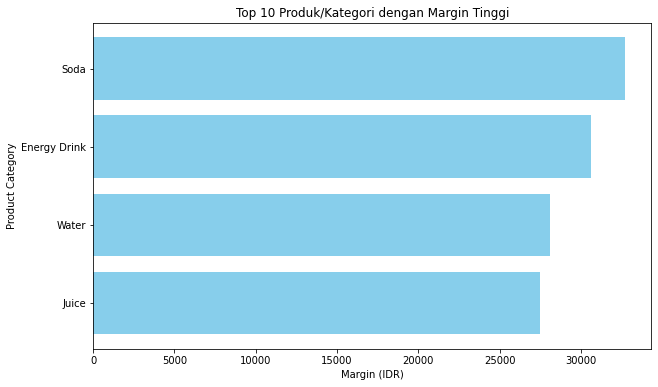

In [15]:
import matplotlib.pyplot as plt

# Produk/Kategori dengan Margin Tinggi
plt.figure(figsize=(10, 6))
top_high_margin_products = top_high_margin_products.sort_values(by='Margin (IDR)', ascending=False)

plt.barh(
    top_high_margin_products['Product Category'],
    top_high_margin_products['Margin (IDR)'],
    color='skyblue'
)
plt.xlabel('Margin (IDR)')
plt.ylabel('Product Category')
plt.title('Top 10 Produk/Kategori dengan Margin Tinggi')
plt.gca().invert_yaxis()  # Membalikkan urutan sumbu Y agar margin tertinggi di atas
plt.show()


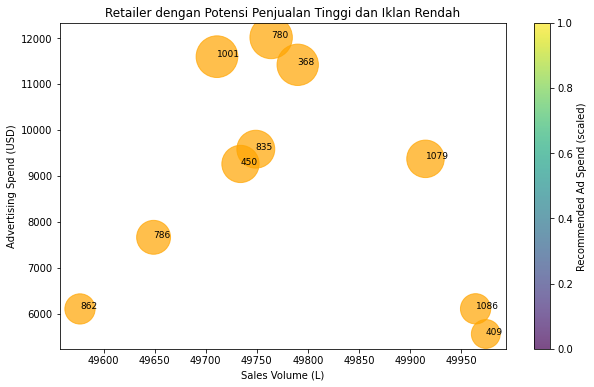

In [16]:
# Retailer dengan Potensi Tinggi
plt.figure(figsize=(10, 6))
plt.scatter(
    top_under_advertised_retailers['Sales Volume (L)'],
    top_under_advertised_retailers['Advertising Spend (USD)'],
    s=top_under_advertised_retailers['Recommended Ad Spend (USD)'] / 10,  # Ukuran titik proporsional dengan rekomendasi iklan
    c='orange',
    alpha=0.7
)

for i, row in top_under_advertised_retailers.iterrows():
    plt.text(
        row['Sales Volume (L)'],
        row['Advertising Spend (USD)'],
        row['Product ID'],
        fontsize=9
    )

plt.xlabel('Sales Volume (L)')
plt.ylabel('Advertising Spend (USD)')
plt.title('Retailer dengan Potensi Penjualan Tinggi dan Iklan Rendah')
plt.colorbar(label='Recommended Ad Spend (scaled)')
plt.show()


*Kesimpulan:*
1. Identifikasi Produk/Kategori dengan Margin Tinggi
Hasil: Produk/kategori dengan margin tertinggi memiliki potensi besar untuk meningkatkan profit jika diberi dukungan berupa peningkatan iklan atau strategi diskon untuk memperluas pangsa pasar.

Observasi:
Margin produk/kategori tertentu jauh lebih tinggi dibanding rata-rata, dan beberapa kategori juga memiliki pangsa pasar yang signifikan.
Contoh: Produk dari kategori tertentu (misalnya, "Soda") mendominasi margin tinggi sekaligus memiliki market share yang kompetitif.

2. Optimalkan Pengeluaran Iklan untuk Retailer dengan Potensi Penjualan Tinggi
Hasil: Terdapat retailer dengan penjualan tinggi tetapi memiliki pengeluaran iklan yang rendah dibandingkan rata-rata.

Observasi:
Retailer dengan sales volume tinggi tetapi kurang optimal dari sisi pengeluaran iklan menunjukkan potensi peningkatan penjualan jika pengeluaran iklan ditingkatkan secara strategis.
Beberapa retailer yang memiliki volume penjualan tinggi seharusnya menerima fokus iklan lebih besar untuk meningkatkan penetrasi pasar.

*Rekomendasi Strategi:*
Fokus pada Produk/Kategori dengan Margin Tinggi:

Prioritaskan peningkatan alokasi anggaran iklan untuk produk dengan margin tinggi.
- Lakukan diskon selektif pada produk dengan margin tinggi untuk menarik lebih banyak konsumen, khususnya pada kategori dengan market share kompetitif.
- Tingkatkan Pengeluaran Iklan pada Retailer Potensial:

Alokasikan pengeluaran iklan tambahan pada retailer dengan volume penjualan tinggi tetapi pengeluaran iklan rendah.
- Gunakan rekomendasi iklan berdasarkan data prediktif untuk memastikan anggaran dioptimalkan pada retailer dengan ROI tertinggi.
- Monitor dan Validasi Strategi:

Lakukan A/B testing untuk membandingkan efektivitas antara peningkatan iklan dan diskon terhadap produk margin tinggi.
- Pantau peningkatan penjualan retailer setelah optimalisasi pengeluaran iklan untuk memastikan bahwa hasil sesuai dengan ekspektasi.

_Kesimpulan Utama:_

Produk dengan margin tinggi dan retailer dengan potensi penjualan tinggi adalah area strategis yang paling memungkinkan untuk memberikan dampak signifikan pada total penjualan dan profitabilitas. Dengan data ini, fokuskan investasi pada kategori dan retailer yang memberikan hasil maksimal.